---
title: 波形データを確認する
date: 2024-01-06
tags: [python, waveform]
exports:
    - format: pdf
    - format: typst
---

+++ {"part": "abstract"}

2023年12月に取得した宇宙線の同時計測イベントの波形データを確認しました。
CSV形式のデータを``pandas``を使って読み込み、プロットできることを確認しました。

+++

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib as mt
# import matplotlib.pyplot as plt

print(f"Pandas = {pd.__version__}")
print(f"Matplotlib = {mt.__version__}")

Pandas = 2.1.4
Matplotlib = 3.8.2


# Red Pitayaのオシロスコープ画像

Red Pitayaのオシロスコープ機能で保存した波形データの画像です。

![](./graphs.jpg)

2台のCosmic Watchを使って、宇宙線が通過したイベントの、それぞれのCWからの波形データをCSV形式で保存しました。
このデータを、``pandas``で読み込んで、プロットしてみましょう。
ファイル名は``scopeData-2.csv``です。

In [2]:
fname = Path("scopeData-2.csv")
data: pd.DataFrame = pd.read_csv(fname)

読み込んだデータの内容を確認します。
``.head(行数)``メソッドを使って、任意の行数のデータを確認できます。
行数を指定しない場合は、最初の5行のデータが表示されます。

In [3]:
data.head()

TIME μs       IN1       IN2
0    5.000  0.598145 -3.817139
1    4.990  0.613046 -3.795718
2    4.980  0.627947 -3.774298
3    4.971  0.642848 -3.752877
4    4.961  0.657749 -3.731457

CSVデータがきちんと読み込めていることと、カラム名が``["TIMEμs", "IN1", "IN2"]``であることが確認できました。

# データを整理する（カラム名を変更）

``TIMEμs``は毎回``μ``と打たねばならず、名前が使いづらいので``TIME``に変更しておきます。
また、元データ（CSVファイル）を確認すると、`` IN1``、`` IN2``のように左端に半角スペースが挿入されています。
これらは、解析時のタイプミスにつながる可能性があるので、それぞれ``ch1``、``ch2``と変更しておきます。

今回は、すべてのカラム名を小文字にします（これは好みの問題）

In [4]:
names = {"TIME μs": "time", " IN1": "ch1", " IN2": "ch2"}
data = data.rename(columns=names)
data.head()

time       ch1       ch2
0  5.000  0.598145 -3.817139
1  4.990  0.613046 -3.795718
2  4.980  0.627947 -3.774298
3  4.971  0.642848 -3.752877
4  4.961  0.657749 -3.731457

カラム名が変更できました。

# データをプロットする

<Axes: title={'center': 'Waveform of CH2'}, xlabel='time', ylabel='ch2'>

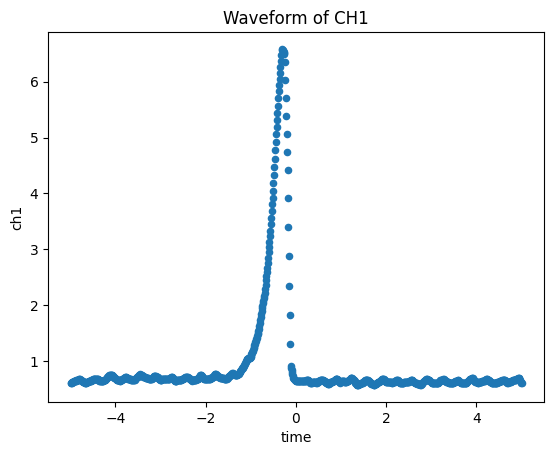

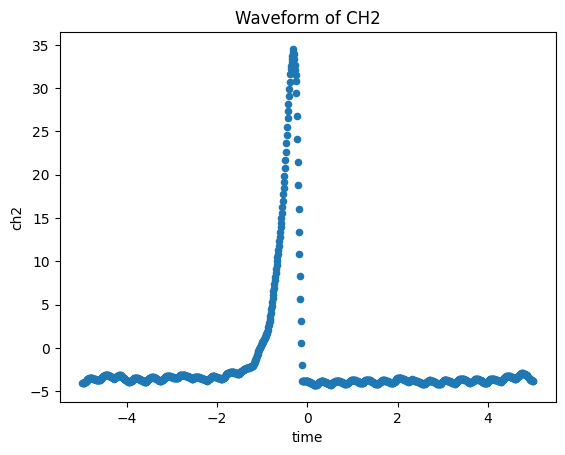

In [5]:
data.plot.scatter(x="time", y="ch1", title="Waveform of CH1")
data.plot.scatter(x="time", y="ch2", title="Waveform of CH2")

## あれ？ちょっとおかしい？

最初に貼り付けた画像のようなプロットになることを想定していました。
しかし、上のプロットは、左右が反転しているようです。
これを修正します。


In [6]:
data["time_flipped"] = -data["time"]
data

time       ch1       ch2  time_flipped
0     5.000  0.598145 -3.817139        -5.000
1     4.990  0.613046 -3.795718        -4.990
2     4.980  0.627947 -3.774298        -4.980
3     4.971  0.642848 -3.752877        -4.971
4     4.961  0.657749 -3.731457        -4.961
...     ...       ...       ...           ...
1019 -4.951  0.619901 -4.007900         4.951
1020 -4.961  0.615245 -4.025595         4.961
1021 -4.971  0.610588 -4.043290         4.971
1022 -4.980  0.605932 -4.060985         4.980
1023 -4.990  0.606032 -4.047165         4.990

[1024 rows x 4 columns]

# プロットを再確認する

再び、散布図を作成してみます。
X軸のカラム名は、さきほど追加した``elapsed_time_fixed``を指定します。

<Axes: title={'center': 'Waveform of CH2'}, xlabel='time_flipped', ylabel='ch2'>

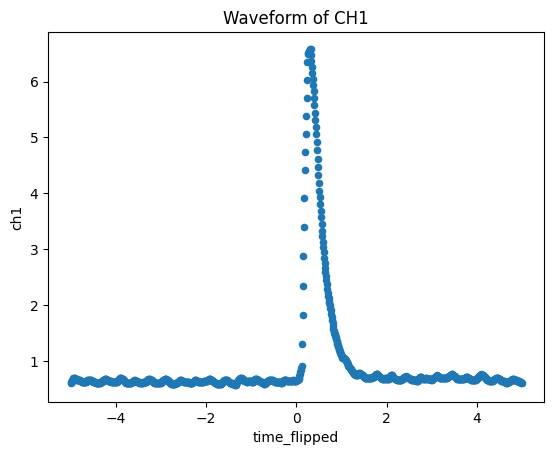

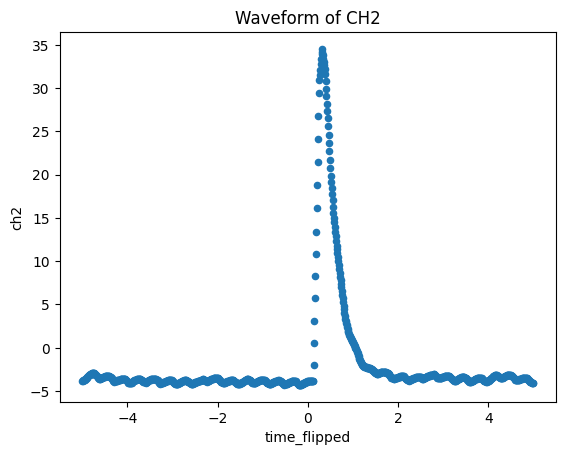

In [7]:
data.plot.scatter(x="time_flipped", y="ch1", title="Waveform of CH1")
data.plot.scatter(x="time_flipped", y="ch2", title="Waveform of CH2")

時間を反転した正しいプロットを描くことができました。
このデータを``data_01.csv``というファイル名で保存しておきましょう。

In [8]:
fname = "data_01.csv"
data.to_csv(fname, index=False)